In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import warnings
import os
import seaborn as sns
warnings.filterwarnings('ignore')


In [2]:
cleaned_data = pd.read_csv('./dataset/cc_cleaned_data.csv')
cleaned_data.head()

,Unnamed: 0,runtime_in_ms,records_processed,size_in_bytes,parallel_number,profile_SAP_ALL,profile_SAP_APPX,profile_SAP_CUST,profile_SAP_UCSV,profile_SAP_UONL,...,ignore_exit_errors_0,ignore_exit_errors_X,ignore_table_errors_0,ignore_table_errors_X,lock_source_client_0,lock_source_client_X,use_exclusive_locks_0,use_exclusive_locks_X,use_table_segmenter_0,use_table_segmenter_X
0,0,1290,30619937,2721723523,6,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,1,1192,48666506,3902691720,6,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
2,5,2875,152299974,13405474528,6,0,0,0,1,0,...,0,1,1,0,1,0,0,1,1,0
3,8,1176,50315435,3035348648,6,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
4,9,1180,82981731,9182413424,6,1,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


In [3]:
cleaned_data.drop(columns=['parallel_number'],inplace=True)
cleaned_data.head()

,Unnamed: 0,runtime_in_ms,records_processed,size_in_bytes,profile_SAP_ALL,profile_SAP_APPX,profile_SAP_CUST,profile_SAP_UCSV,profile_SAP_UONL,profile_SAP_USER,...,ignore_exit_errors_0,ignore_exit_errors_X,ignore_table_errors_0,ignore_table_errors_X,lock_source_client_0,lock_source_client_X,use_exclusive_locks_0,use_exclusive_locks_X,use_table_segmenter_0,use_table_segmenter_X
0,0,1290,30619937,2721723523,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
1,1,1192,48666506,3902691720,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
2,5,2875,152299974,13405474528,0,0,0,1,0,0,...,0,1,1,0,1,0,0,1,1,0
3,8,1176,50315435,3035348648,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
4,9,1180,82981731,9182413424,1,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


In [4]:
cleaned_data.describe()

,Unnamed: 0,runtime_in_ms,records_processed,size_in_bytes,profile_SAP_ALL,profile_SAP_APPX,profile_SAP_CUST,profile_SAP_UCSV,profile_SAP_UONL,profile_SAP_USER,...,ignore_exit_errors_0,ignore_exit_errors_X,ignore_table_errors_0,ignore_table_errors_X,lock_source_client_0,lock_source_client_X,use_exclusive_locks_0,use_exclusive_locks_X,use_table_segmenter_0,use_table_segmenter_X
count,211.000000,211.000000,2.110000e+02,2.110000e+02,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,...,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,175.748815,1736.436019,2.053538e+08,1.170030e+10,0.497630,0.004739,0.018957,0.303318,0.023697,0.127962,...,0.421801,0.578199,0.777251,0.222749,0.492891,0.507109,0.502370,0.497630,0.914692,0.085308
std,103.249575,1667.784393,2.472842e+08,1.591042e+10,0.501183,0.068843,0.136699,0.460784,0.152464,0.334842,...,0.495021,0.495021,0.417081,0.417081,0.501138,0.501138,0.501183,0.501183,0.280004,0.280004
min,0.000000,58.000000,4.452300e+04,1.340438e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,89.500000,878.000000,3.220423e+07,2.267669e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,178.000000,1397.000000,1.045430e+08,8.195264e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,258.500000,2089.000000,3.061955e+08,1.506873e+10,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,359.000000,14874.000000,1.646861e+09,1.225398e+11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### lets check the distribution of various numeric features

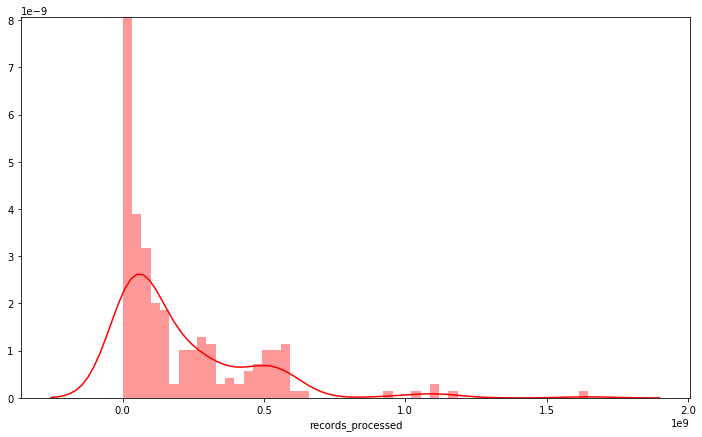

In [5]:

plt.figure(figsize=(12,7))
sns.distplot(cleaned_data['records_processed'],
             label = '1',
             color = 'red',
             bins=50
            )
plt.show()

Let's normalize it

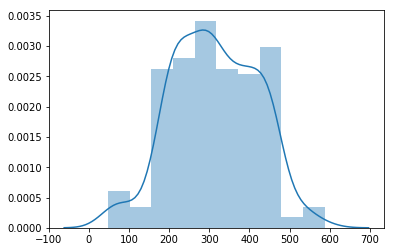

In [6]:
normalized_data,fitted = stats.boxcox(cleaned_data['records_processed'])
sns.distplot(normalized_data)

In [7]:
cleaned_data['records_processed'] = normalized_data

In [8]:
cleaned_data.head()

,Unnamed: 0,runtime_in_ms,records_processed,size_in_bytes,profile_SAP_ALL,profile_SAP_APPX,profile_SAP_CUST,profile_SAP_UCSV,profile_SAP_UONL,profile_SAP_USER,...,ignore_exit_errors_0,ignore_exit_errors_X,ignore_table_errors_0,ignore_table_errors_X,lock_source_client_0,lock_source_client_X,use_exclusive_locks_0,use_exclusive_locks_X,use_table_segmenter_0,use_table_segmenter_X
0,0,1290,230.625058,2721723523,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
1,1,1192,257.280046,3902691720,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
2,5,2875,336.524025,13405474528,0,0,0,1,0,0,...,0,1,1,0,1,0,0,1,1,0
3,8,1176,259.309607,3035348648,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
4,9,1180,291.746795,9182413424,1,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


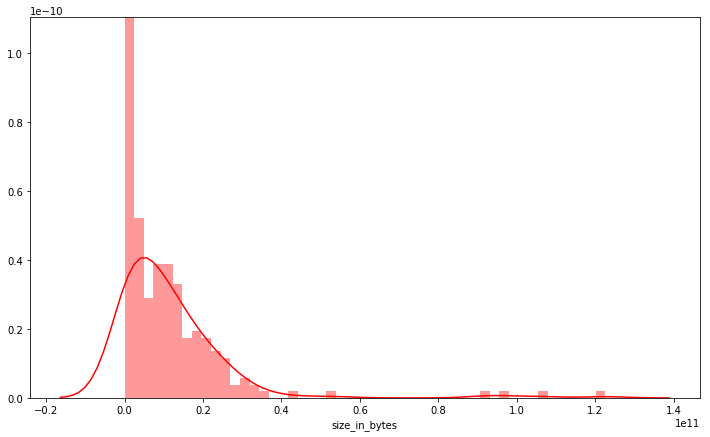

In [9]:
plt.figure(figsize=(12,7))
sns.distplot(cleaned_data['size_in_bytes'],
             label = '1',
             color = 'red',
             bins=50
            )
plt.show()

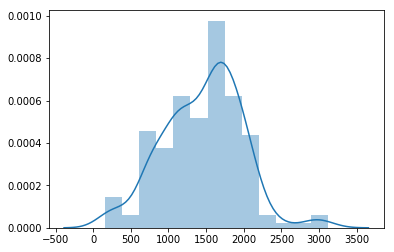

In [10]:
normalized_data,fitted = stats.boxcox(cleaned_data['size_in_bytes'])
sns.distplot(normalized_data)

In [11]:
cleaned_data['size_in_bytes'] = normalized_data

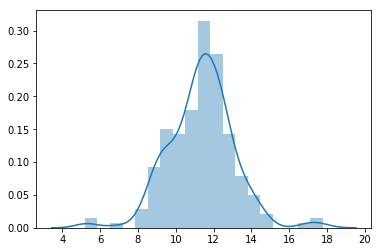

In [12]:
normalized_data,fitted = stats.boxcox(cleaned_data['runtime_in_ms'])
sns.distplot(normalized_data)

In [13]:
cleaned_data['runtime_in_ms'] = normalized_data

In [14]:
y = cleaned_data['runtime_in_ms']
# X = cleaned_data.loc[:, cleaned_data.columns != 'runtime_in_ms']
X = cleaned_data[['records_processed','size_in_bytes','use_exclusive_locks_X','use_exclusive_locks_0']]

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 4)

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=3)
X_train_poly = poly_reg.fit_transform(X_train)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linear = LinearRegression()
linear.fit(X_train_poly,y_train)
y_pred=linear.predict(poly_reg.fit_transform(X_test))
print(r2_score(y_test,y_pred))

0.5710333102880181


In [18]:
linear.score(poly_reg.fit_transform(X_test),y_test)

0.5710333102880181

### R2 Score = 0.695294231970498
### That is it correctly predicts the right runtime __69.5 %__ of the times

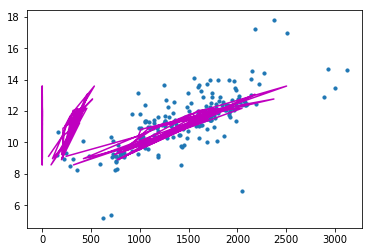

In [19]:
plt.scatter(X.size_in_bytes ,y,s=10)
plt.plot(X_test,y_pred,color= 'm')
plt.show()

In [20]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xgbModel = xgb.XGBRegressor()

In [21]:
xgbModel.fit(X_train_poly,y_train)

[22:03:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [22]:
y_xgb_pred=xgbModel.predict(poly_reg.fit_transform(X_test))

In [23]:
r2_score(y_test,y_xgb_pred)

0.559578848059895

### Lets try to reduce the dimensionality of the data and test the performance

In [24]:
y = cleaned_data['runtime_in_ms']
X = cleaned_data.loc[:, cleaned_data.columns != 'runtime_in_ms']

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca_data = pca.fit_transform(X)
print('New shape :',x_pca_data.shape)

New shape : (211, 2)


In [26]:
# Attach the label
pca_data = np.vstack((x_pca_data.T,y)).T
print('pca',pca_data.shape)
pca_df = pd.DataFrame(pca_data)
print('pca_df',pca_df.shape)  

pca (211, 3)
pca_df (211, 3)


In [27]:
pca_df.columns = ['pc_1','pc_2','runtime_in_ms']
pca_df.head()

,pc_1,pc_2,runtime_in_ms
0,-323.273877,-175.432690,11.220742
1,-206.293993,-174.444872,11.038670
2,283.106706,-174.746672,13.166020
3,-285.001974,-164.871546,11.007697
4,112.494243,-171.542578,11.015475


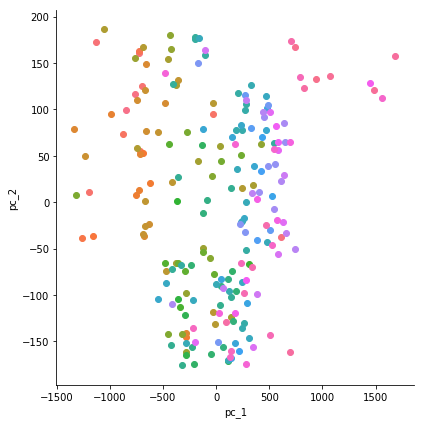

In [28]:
sns.FacetGrid(pca_df,hue='runtime_in_ms',size = 6).map(plt.scatter,'pc_1','pc_2')
plt.show()

In [29]:
X_train, X_test ,y_train ,y_test = train_test_split(x_pca_data,
                                                    y,
                                                    test_size=0.3)

In [30]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train,y_train)
y_ridge_pred = ridge_model.predict(X_test)

In [31]:
r2_score(y_test,y_ridge_pred)

0.5456276657956887

### Feature Elimination

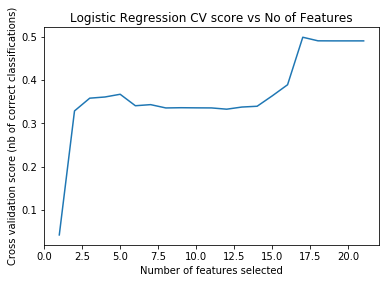

In [34]:
X_train, X_test ,y_train ,y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state = 4,
                                                   )


from sklearn.feature_selection import RFECV

rid = Ridge()
rfecv = RFECV(estimator=rid,step =1,cv=10,scoring='r2')
rfecv.fit(X_train,y_train)

plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()